In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) =  keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [16]:
len(X_train), len(X_test), len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

In [19]:
X_train[0].shape

(28, 28)

In [57]:
X_train = X_train/ 255
X_test = X_test / 255

In [58]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

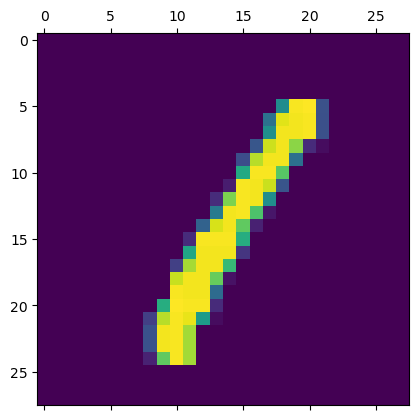

In [59]:
plt.matshow(X_train[3])

In [60]:
y_train[3]

1

In [61]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [62]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)

In [63]:
X_train_flattened.shape

(60000, 784)

In [64]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [65]:
X_test_flattened.shape

(10000, 784)

In [66]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [99]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid"),
])

In [100]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [101]:
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 808us/step - loss: 0.2772 - accuracy: 0.9219
Epoch 2/10
1875/1875 [==============================] - 2s 804us/step - loss: 0.1246 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 2s 803us/step - loss: 0.0871 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 2s 814us/step - loss: 0.0652 - accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 2s 801us/step - loss: 0.0530 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 2s 807us/step - loss: 0.0433 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 2s 814us/step - loss: 0.0339 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 2s 808us/step - loss: 0.0295 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 2s 854us/step - loss: 0.0242 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 2s 863u

In [102]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 375us/step - loss: 0.0886 - accuracy: 0.9767


[0.08860525488853455, 0.9767000079154968]

In [103]:
y_pred = model.predict(X_test_flattened)

313/313 [==============================] - 0s 339us/step


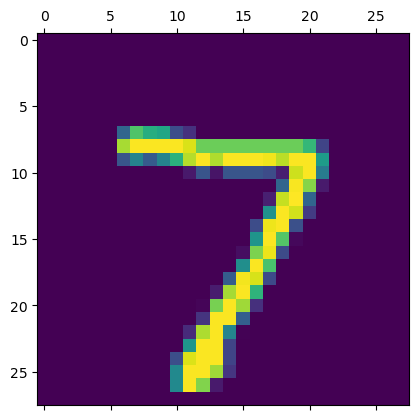

In [104]:
plt.matshow(X_test[0])

In [105]:
np.argmax(y_pred[0])

7

In [106]:
y_test[0]

7

In [107]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [108]:
cm = tf.math.confusion_matrix(predictions=y_pred_labels,labels=y_test)

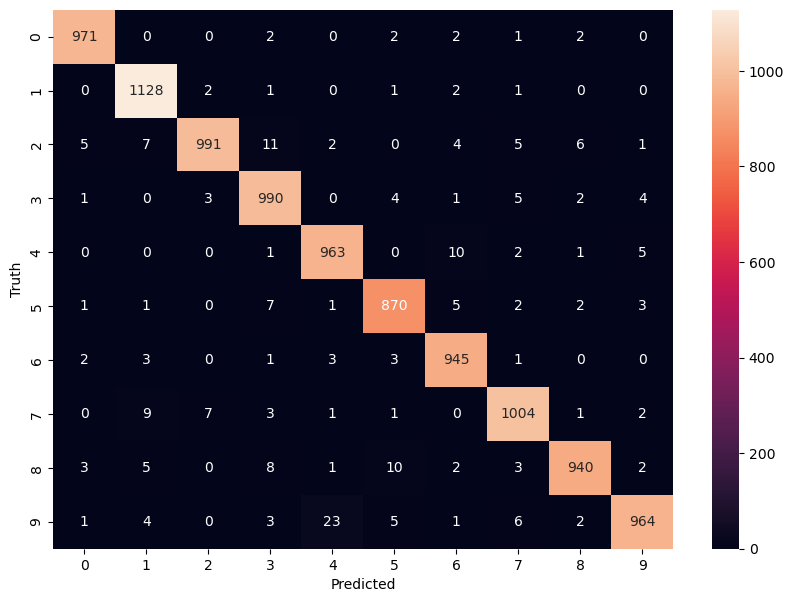

In [109]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [110]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100,  activation="relu"),
    keras.layers.Dense(10, activation="sigmoid"),
])

In [111]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 830us/step - loss: 0.2744 - accuracy: 0.9223
Epoch 2/10
1875/1875 [==============================] - 1s 783us/step - loss: 0.1229 - accuracy: 0.9642
Epoch 3/10
1875/1875 [==============================] - 2s 802us/step - loss: 0.0859 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 2s 803us/step - loss: 0.0635 - accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 2s 846us/step - loss: 0.0503 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 1s 781us/step - loss: 0.0399 - accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 1s 795us/step - loss: 0.0324 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 1s 788us/step - loss: 0.0263 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 1s 796us/step - loss: 0.0217 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 2s 805u

In [112]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 392us/step - loss: 0.1023 - accuracy: 0.9740


[0.10229534655809402, 0.9739999771118164]

In [113]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 381us/step


In [114]:
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(predictions=y_pred_labels,labels=y_test)

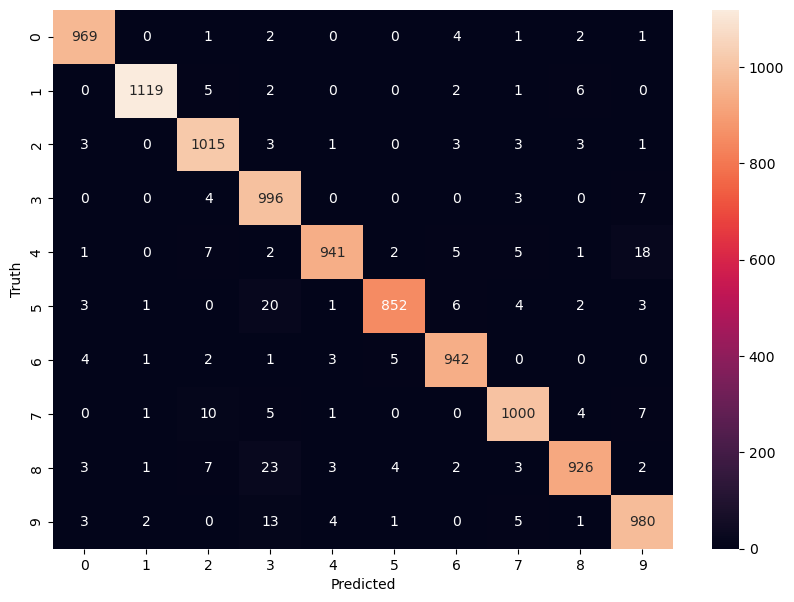

In [115]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()